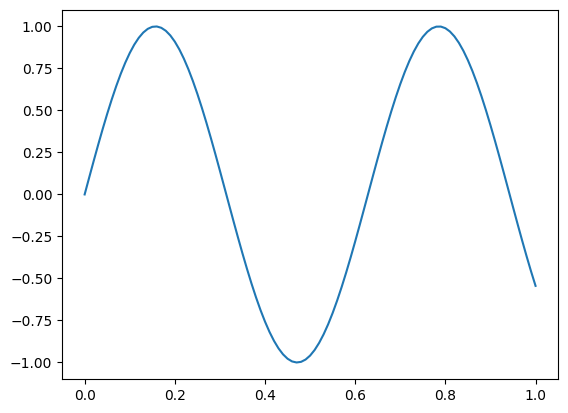

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fs = 100
t = np.arange(0, 1+ 1/fs, 1/fs)
f = 10
y = np.sin(f*t)

plt.plot(t, y)
plt.show()

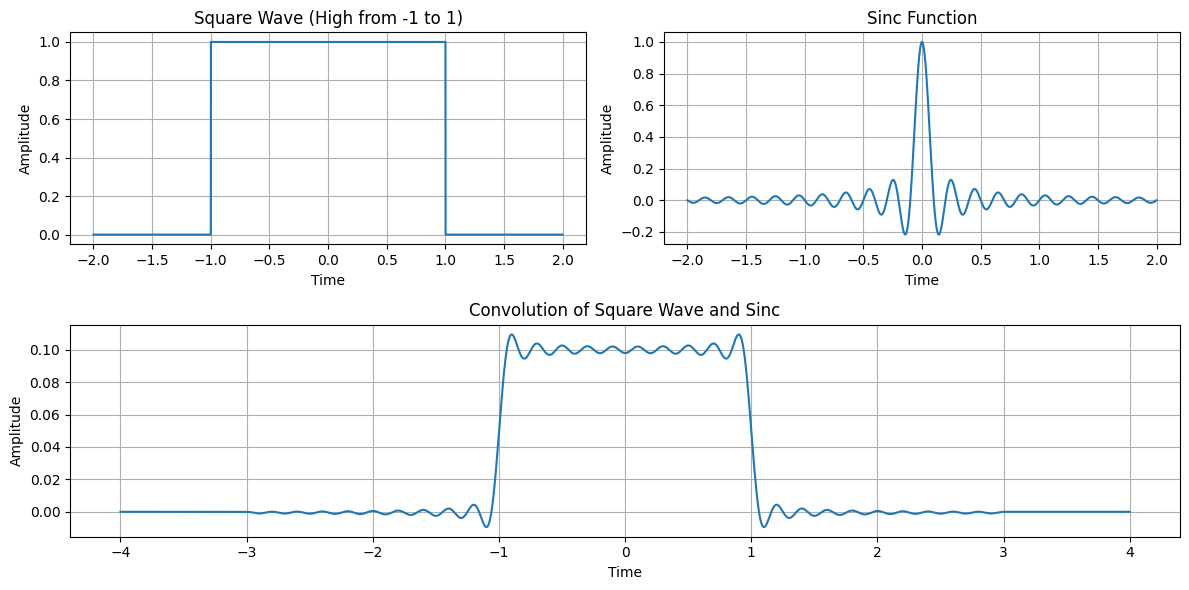

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Sampling frequency
fs = 1000 
f = 10
# Time
t = np.arange(-2, 2, 1/fs)
# Square Wave Signal
squ_arr = ((t >= -1) & (t <= 1)).astype(float)
# Sinc Signal
sinc_arr = np.sinc(f*t)

# Performing the Convolution
conv_len = len(squ_arr) + len(sinc_arr) - 1
conv_array = np.zeros(conv_len)

for n in range(conv_len):
    for k in range(len(sinc_arr)):
        if 0 <= n - k < len(squ_arr):
            conv_array[n] += sinc_arr[k] * squ_arr[n - k] * (1/fs)

t_conv = np.arange(conv_len) / fs + (2*t[0])

# Create figure and GridSpec
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, figure=fig)

# Square Wave
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t, squ_arr)
ax1.set_title('Square Wave (High from -1 to 1)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Sinc Function
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, sinc_arr)
ax2.set_title('Sinc Function')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')
ax2.grid(True)

# Convoluted Signal
ax3 = fig.add_subplot(gs[1, :])
ax3.plot(t_conv, conv_array)
ax3.set_title('Convolution of Square Wave and Sinc')
ax3.set_xlabel('Time')
ax3.set_ylabel('Amplitude')
ax3.grid(True)

plt.tight_layout()
plt.show()


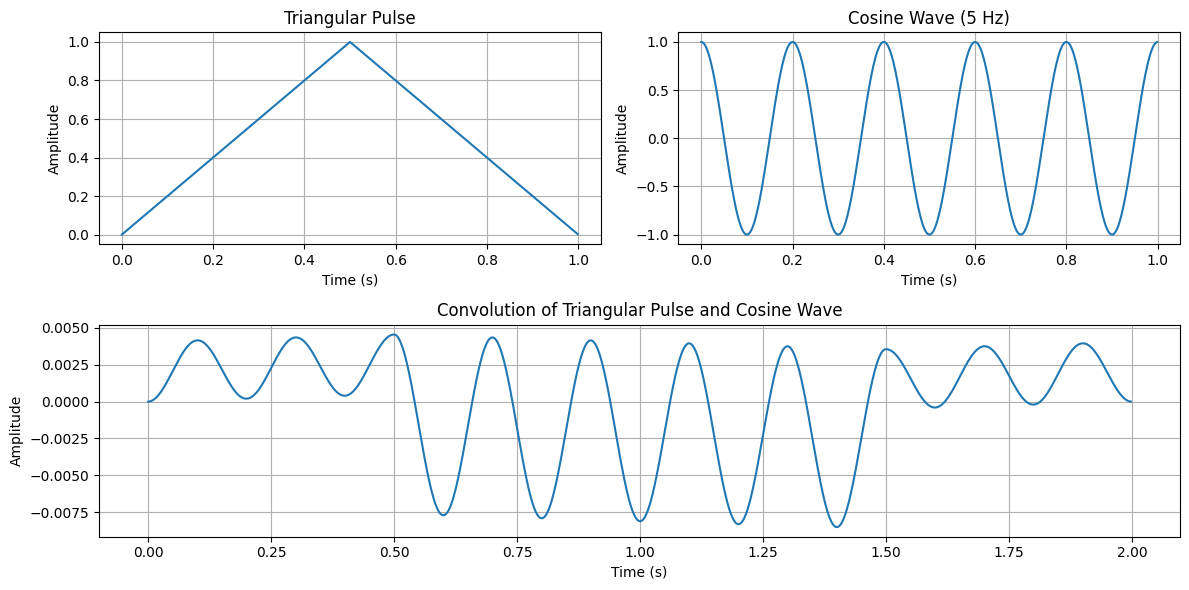

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Sampling frequency
fs = 1000                  
t = np.arange(0, 1, 1/fs)  # 1-second duration

# Signal 1: Triangular pulse
tri = 1 - np.abs(2*t - 1) 
tri[tri < 0] = 0           

# Signal 2: Cosine wave
f = 5                      # 5 Hz cosine
cos_wave = np.cos(2 * np.pi * f * t)

# Convolution
conv_result = np.convolve(tri, cos_wave, mode='full') / fs
t_conv = np.arange(len(conv_result)) / fs

# Plotting
fig = plt.figure(figsize=(12,6))
gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t, tri)
ax1.set_title("Triangular Pulse")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax1.grid(True)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, cos_wave)
ax2.set_title("Cosine Wave (5 Hz)")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")
ax2.grid(True)

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(t_conv, conv_result)
ax3.set_title("Convolution of Triangular Pulse and Cosine Wave")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Amplitude")
ax3.grid(True)

plt.tight_layout()
plt.show()